In [1]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(18,12)})

In [3]:
data = pd.read_csv("../sthlm/sthlm_v1.csv")

# Intro

I'm analysing & visualizing the price development of apartments with different number of rooms sold in Stockholm (2013-2020). I wan't to examine if there are meaningful differences in price development for the different groups. 

# Monthly development of avg. price / sqm for 1,2 & 3 rooms

In [8]:
# I'm only looking at the top3 room categories...
# ... 1,2 & 3 no. of rooms
data.rum.value_counts()

2.0    23444
3.0    11321
1.0    11290
4.0     4173
1.5     3468
2.5     1886
5.0      963
3.5      839
4.5      251
6.0      210
5.5       46
7.0       29
6.5       10
9.0        3
8.0        2
7.5        1
Name: rum, dtype: int64

## Average price

In [9]:
# lst with categories of room I want to look at
lst_rum123 = [1.0,2.0,3.0]

In [19]:
# create new df where value for column rum is in my list of room-categories i want to look at
# groupby: 1) no. of rooms, 2) "year and month"
# calculate: avg. of price/sqm

# so for every month i have an average price/sqm for objects with 1 room, 2 room and 3 room (separately)
snitt_rum123 = data.loc[data.rum.isin(lst_rum123)].groupby(["rum", "år_månad"])[["kr_kvm"]].mean()

In [22]:
# I have a multiindex with room and year_month and i want to pull out the room-categories so they have 1 column each...
# ... for the avg. price/sqm for each month
snitt_rum123.head()

kr_kvm
rum år_månad                
1.0 2013-01-01  67159.268293
    2013-02-01  67855.500000
    2013-03-01  68554.377358
    2013-04-01  68411.750000
    2013-05-01  70102.764706

In [21]:
# I'm unstacking my table on rooms(index-level 0) to get the desired result
snitt_rum123.unstack(0)

kr_kvm                            
rum                   1.0           2.0           3.0
år_månad                                             
2013-01-01   67159.268293  59148.106383  55225.677419
2013-02-01   67855.500000  58673.109091  54039.807692
2013-03-01   68554.377358  59346.277311  57289.160000
2013-04-01   68411.750000  59532.378641  57604.327869
2013-05-01   70102.764706  59834.007519  56290.741379
...                   ...           ...           ...
2020-05-01  100579.340278  89096.467742  82681.145251
2020-06-01  100789.289655  91686.332440  86581.502762
2020-07-01  104904.198113  89720.576744  82044.333333
2020-08-01  103545.148352  91467.498728  91893.723404
2020-09-01  104011.901235  95491.557522  89929.380952

[93 rows x 3 columns]

In [26]:
# Saving this table in a new df (r in the name is for result)
snitt_rum123_r = snitt_rum123.unstack(0)

In [32]:
# I want my index to be in datetime-format so it gets plotted correctly
snitt_rum123_r.index = pd.to_datetime(snitt_rum123_r.index)

In [77]:
# Dropping the kr_kvm index that is a leftover from the earlier unstacking operation
# Minor change that removes redundant info and makes it easier to access columns
snitt_rum123_r = snitt_rum123_r.kr_kvm

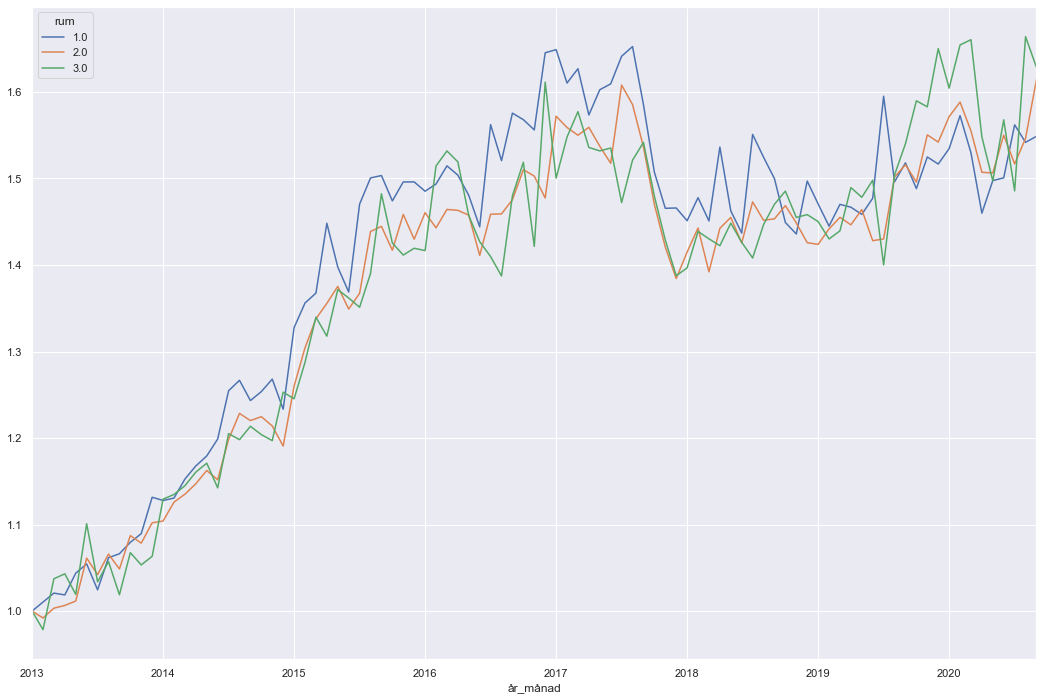

In [78]:
# graph showing avg. price for each month for each group (1,2 & 3 rooms) from 2013-01 to 2020-09 
snitt_rum123_r.plot()
plt.show()

## Average % change in price

Now I want to normalize the price for each category and look at the % change in price for each month 

2013-01-01 is my starting date and I will set that value to 1(start of index-level) and anchor every row-value to it

In [34]:
snitt_rum123_r

kr_kvm                            
rum                   1.0           2.0           3.0
år_månad                                             
2013-01-01   67159.268293  59148.106383  55225.677419
2013-02-01   67855.500000  58673.109091  54039.807692
2013-03-01   68554.377358  59346.277311  57289.160000
2013-04-01   68411.750000  59532.378641  57604.327869
2013-05-01   70102.764706  59834.007519  56290.741379
...                   ...           ...           ...
2020-05-01  100579.340278  89096.467742  82681.145251
2020-06-01  100789.289655  91686.332440  86581.502762
2020-07-01  104904.198113  89720.576744  82044.333333
2020-08-01  103545.148352  91467.498728  91893.723404
2020-09-01  104011.901235  95491.557522  89929.380952

[93 rows x 3 columns]

In [35]:
# function to normalize values for apartments with 1 room
# dividing x with avg. value for my starting to start the index at 1 and then get the following change in %
def one_n(x):
    return x / 67159.268293

In [36]:
# function to normalize values for apartments with 1 room
# dividing x with avg. value for my starting to start the index at 1 and then get the following change in %
def two_n(x):
    return x / 59148.106383

In [37]:
# function to normalize values for apartments with 1 room
# dividing x with avg. value for my starting to start the index at 1 and then get the following change in %
def three_n(x):
    return x / 55225.677419

In [48]:
snitt_rum123_r.head()

kr_kvm                            
rum                  1.0           2.0           3.0
år_månad                                            
2013-01-01  67159.268293  59148.106383  55225.677419
2013-02-01  67855.500000  58673.109091  54039.807692
2013-03-01  68554.377358  59346.277311  57289.160000
2013-04-01  68411.750000  59532.378641  57604.327869
2013-05-01  70102.764706  59834.007519  56290.741379

In [49]:
# creating new df to store the normalized values and not overwriting my previous df
snitt_rum123_r_n = snitt_rum123_r

In [51]:
# applying my function "one_n" to normalize the values for apartments with 1 room
# overwriting the column with avg. prize
snitt_rum123_r_n.kr_kvm[1.0] = snitt_rum123_r_n.kr_kvm[1.0].apply(one_n)

In [52]:
# same as previous cell but for apartments with 2 rooms
snitt_rum123_r_n.kr_kvm[2.0] = snitt_rum123_r_n.kr_kvm[2.0].apply(two_n)

In [53]:
# same as previous cell but for apartments with 3 rooms
snitt_rum123_r_n.kr_kvm[3.0] = snitt_rum123_r_n.kr_kvm[3.0].apply(three_n)

In [55]:
# Inspecting new df with normalized values
# We have successfully normalized the values in our columns
# Now we just want to make a minor change to drop the kr_kvm index and make it easier to access columns
snitt_rum123_r_n.head()

kr_kvm                    
rum              1.0       2.0       3.0
år_månad                                
2013-01-01  1.000000  1.000000  1.000000
2013-02-01  1.010367  0.991969  0.978527
2013-03-01  1.020773  1.003350  1.037365
2013-04-01  1.018649  1.006497  1.043071
2013-05-01  1.043829  1.011596  1.019286

In [68]:
# Now we dropped the kr_kvm indexing
snitt_rum123_r_n = snitt_rum123_r_n.kr_kvm

# Inspecting results...
snitt_rum123_r_n

rum,1.0,2.0,3.0
år_månad,,,
2013-01-01,1.000000,1.000000,1.000000
2013-02-01,1.010367,0.991969,0.978527
2013-03-01,1.020773,1.003350,1.037365
2013-04-01,1.018649,1.006497,1.043071
2013-05-01,1.043829,1.011596,1.019286
...,...,...,...
2020-05-01,1.497624,1.506328,1.497150
2020-06-01,1.500750,1.550114,1.567776
2020-07-01,1.562021,1.516880,1.485619


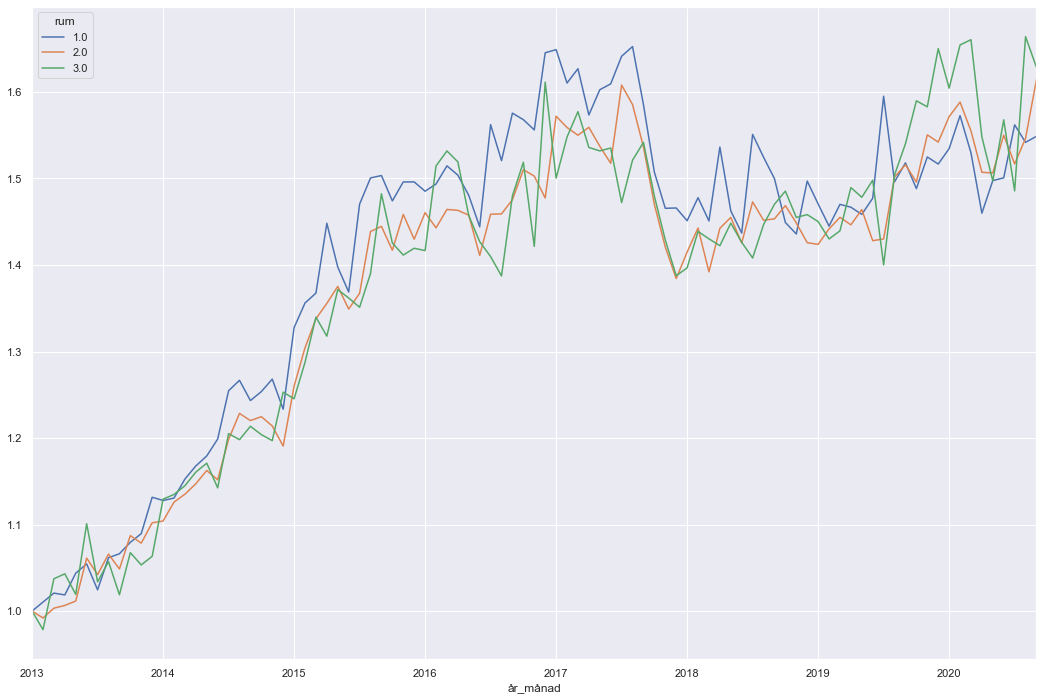

In [69]:
# Comments about findings:
# Apartments with 1 room have up until recently continously outperformed apartments with 2 and 3 rooms with regards to...
# ... avg % increase in price/sqm

# The breaking of the above mentioned trend that occurred in the middle of 2019 is not found anywhere else and...
# ... could show a significant change 
snitt_rum123_r_n.plot()
plt.show()

## Correlations

Looking at correlations in price development of apartments with different number of rooms.

And as before we are only looking at aparments with 1,2 or 3 rooms

In [71]:
# correlation-matrix
snitt_rum123_r_n.corr()

rum,1.0,2.0,3.0
rum,,,
1.0,1.000000,0.974907,0.935743
2.0,0.974907,1.000000,0.971833
3.0,0.935743,0.971833,1.000000


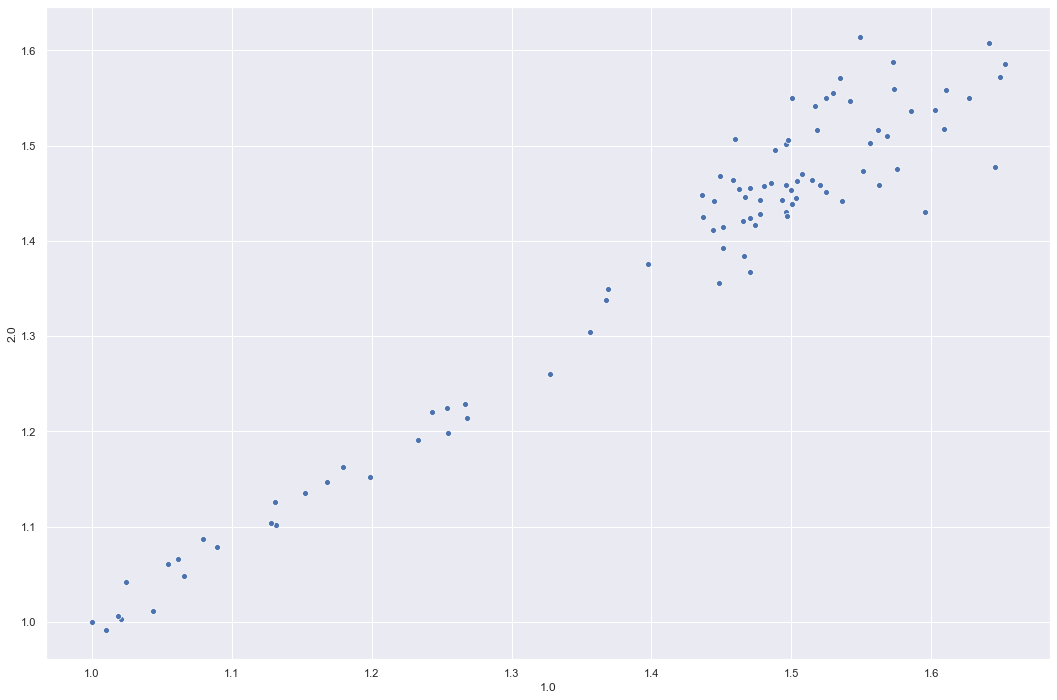

In [72]:
# looking at apartments with 1 and 2 rooms
# corr is ~ 97.5 as shown in our matrix above
sns.scatterplot(data = snitt_rum123_r_n, x=1, y = 2)

plt.show()

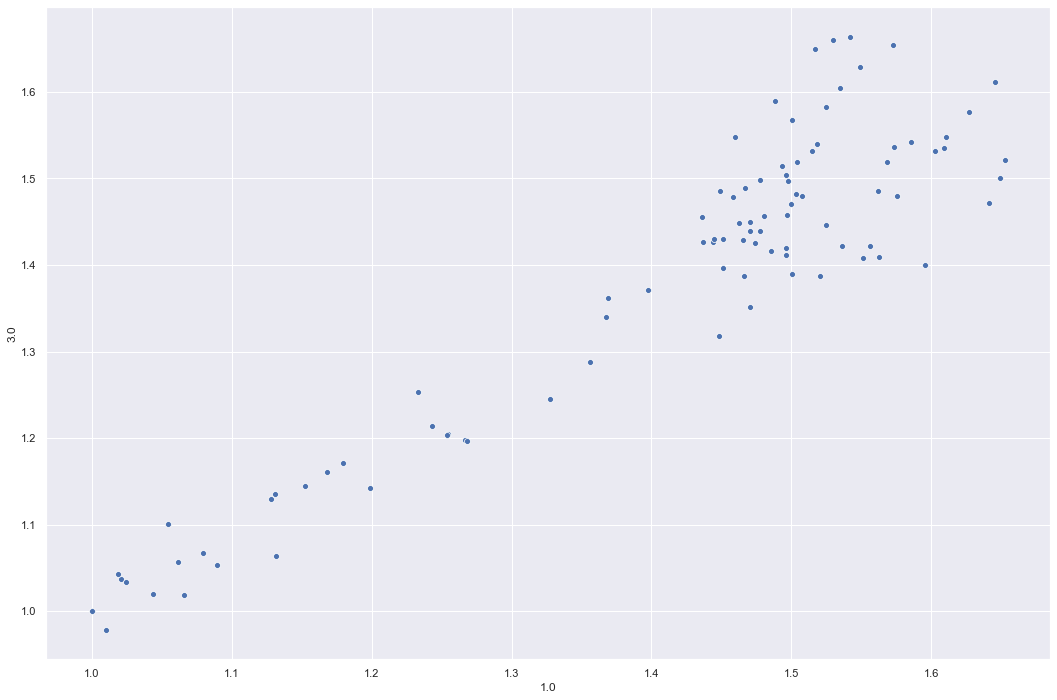

In [73]:
# looking at apartments with 1 and 3 rooms
# corr is ~ 93.6 as shown in our matrix above
sns.scatterplot(data = snitt_rum123_r_n, x=1, y = 3)

plt.show()

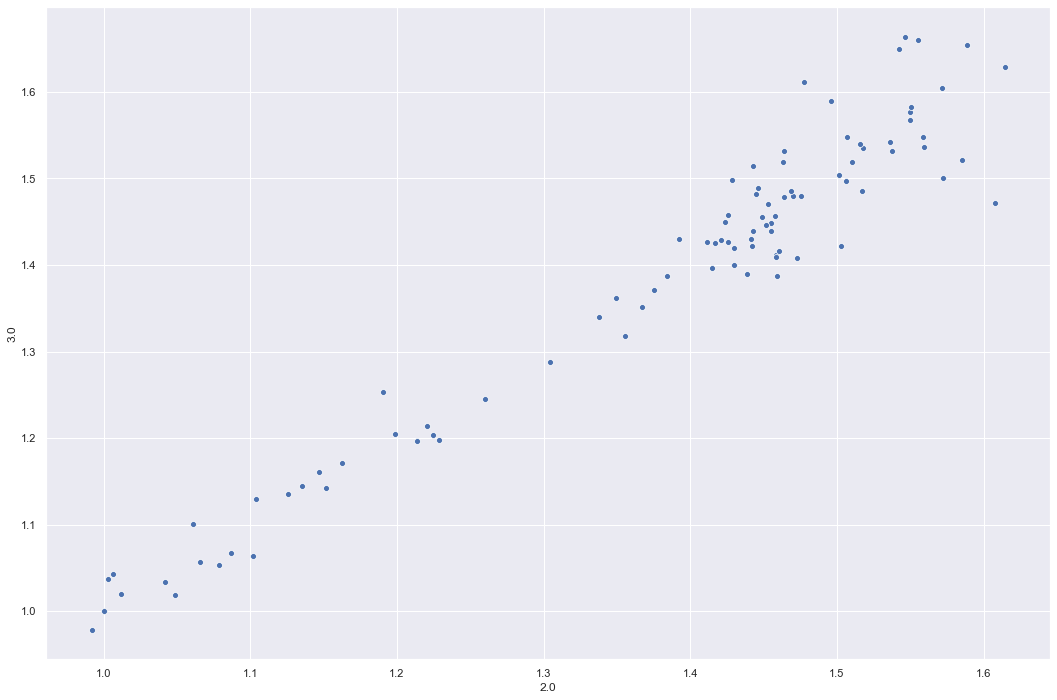

In [75]:
# looking at apartments with 2 and 3 rooms
# corr is ~ 97.2 as shown in our matrix above
sns.scatterplot(data = snitt_rum123_r_n, x=2, y = 3)

plt.show()

# Possible future update - compare different areas and/or different streets

It could be of interest to study differences and similarities in price development between different areas and or streets.

The execution of such an analysis would mirror the one above where I am comparing different rooms.